# Capstone Project - The Battle of the Neighborhoods

## Applied Data Science Capstone by IBM/Coursera

## Table of contents

- Introduction
- Data
- Methodology
- Analysis
- Results and Discussion
- Conclusion

## 1. Introduction

   Houston Texas is the largest city in the state comprising of 88 super neighborhoods with an estimated population of 2,325,502. Houston is commonly known for its food, job availability, night life, and NASA. With this popularity Houston is classified as one of the fastest growing cities in the nation. With this ever-increasing population comes a growing demand to address the needs of the residents that make Houston home.  One of the largest problems facing the city is that of food deserts. Food deserts according to the CDC are “areas that lack access to affordable fruits, vegetables, whole grains, low-fat milk, and other foods that make up the full range of a healthy diet.” Individuals living in areas classified as food deserts are shown to have an increased risk of developing diabetes, cardiovascular disease, and being obese. While food deserts can be present in areas typically associated as having low income, they can be present in any area that causes an individual to not have easy access to an available grocery store, and overall, about 23.5 million Americans and a reported 250,000  individuals living in Houston, TX lack easy access to grocery stores according to Rice University.  

   While living in food deserts are shown to negatively impact ones health, these areas would present lower competition for new grocery stores and allow for a perfect opportunity for business owners to open new grocery stores that not only help alleviate public health concerns, but to also serve the demand for fresh food for individuals that live in impacted areas leading to a greater possibility for a successful store.  
   
   
 

### 1.1 Objective

The objective of this project is to find what neighborhoods could possibly be labeled as food deserts and to select the best locations to open a new grocery store that not only alleviates the problem of food deserts but also has the best probability of success due to lack of competition in the city of Houston, Tx. 

### 1.2 Interest

This project is useful to a variety of groups, such as public health officials in finding possible food deserts within the Houston community, people looking to move into a neighborhood that has easy access to a grocery store, and finally business owners or developers looking to open new grocery store in an area with lower competition in Houston, Tx. This project is relevant as food deserts are not just a public health issue, but are an untapped resource for business and developers who are looking at finding an area to create a store with the highest probability of success and in areas with low competition.  
 

## 2. Data

### 2.1 Source of data

- The data for the project comes from the  page (http://www.houstontx.gov/planning/Demographics/demograph_docs/income_avgs.htm) which contains the list of neighborhoods within Houston as well as their location relative to downtown, Texas totaling to 88 super neighborhoods.
- Geocoder 
- Foursquare API 

### 2.2 Data Preparation

Importing the libraries

In [4]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Load the coordinates of the boroughs into a dataframe

In [5]:
df=pd.read_html("https://en.wikipedia.org/wiki/List_of_Houston_neighborhoods",header=0)[0]
df.head()

,#,Name,Location relative to Downtown Houston,Approximate boundaries
0,1,Willowbrook,Northwest,Along Texas State Highway 249 northwest of Bel...
1,2,Greater Greenspoint,North,Around the junction of Beltway 8 and Interstat...
2,3,Carverdale,Northwest,South of the junction of Beltway 8 and U.S. Ro...
3,4,Fairbanks / Northwest Crossing,Northwest,Along U.S. Route 290 between Interstate 610 an...
4,5,Greater Inwood,Northwest,North of Fairbanks / Northwest Crossing and ea...


In [6]:
df.drop(["Approximate boundaries"],axis=1,inplace=True)

In [7]:
df.rename(columns={"#":"Number"},inplace=True)
df.head()

,Number,Name,Location relative to Downtown Houston
0,1,Willowbrook,Northwest
1,2,Greater Greenspoint,North
2,3,Carverdale,Northwest
3,4,Fairbanks / Northwest Crossing,Northwest
4,5,Greater Inwood,Northwest


In [8]:
df.shape

(88, 3)

 to get the Coordinates of Names in Houston 

In [6]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [2]:
import geocoder

In [3]:
def get_latlng(name):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Houston, Texas'.format(name))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [10]:
coords = [ get_latlng(name) for name in df['Name'].tolist()]

In [11]:
#create temporty data frome
df_coords =pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [12]:
#Merge to old dataframe
df['Latitude']=df_coords['Latitude']
df['Longitude']=df_coords['Longitude']
df.head()

,Number,Name,Location relative to Downtown Houston,Latitude,Longitude
0,1,Willowbrook,Northwest,29.95240,-95.54463
1,2,Greater Greenspoint,North,29.93967,-95.40748
2,3,Carverdale,Northwest,29.84959,-95.54245
3,4,Fairbanks / Northwest Crossing,Northwest,29.84938,-95.51088
4,5,Greater Inwood,Northwest,29.86931,-95.48043


#### Make Map with neighborhoods

In [13]:
#get location of Houston Texas

address ='Houston, Texas'
geolocator = Nominatim(user_agent='my-application')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('Geographical location of Houston Texas is {},{}.'.format(latitude, longitude))

Geographical location of Houston Texas is 29.7589382,-95.3676974.


In [14]:
#Houston Map
Houston_map = folium.Map(location=[latitude, longitude], zoom_start = 11)

for lat, lng, name in zip(df['Latitude'], df['Longitude'], df['Name']):
    label = '{}'.format(name)
    popup = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius = 5,
    popup = popup,
    color = 'blue',
    fill = True,
    fill_color = '#3186cc',
    fill_opacity = 0.7,
    parse_html=False).add_to(Houston_map)
    
Houston_map

### Using Foursquare to get venus in neighbourhoods

In [16]:
CLIENT_ID = 'P2WNEZV5SP2OHVEPYJWH4WI433XRPS505NGNYYVI2JDWXEMJ' # your Foursquare ID
CLIENT_SECRET = 'GVPKL1S5YSIXHLLM4RHNWNBD3YPZWQJ2DV55RBO3J42UEZUP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: P2WNEZV5SP2OHVEPYJWH4WI433XRPS505NGNYYVI2JDWXEMJ
CLIENT_SECRET:GVPKL1S5YSIXHLLM4RHNWNBD3YPZWQJ2DV55RBO3J42UEZUP


In [18]:
#Category ID corresponding to food and drink shop taken from Foursquare website (https://developer.foursquare.com/docs/resources/categories)

radius = 2000
LIMIT = 100

venues_list = []

for lat,lng, name in zip(df['Latitude'],df['Longitude'],df['Name']):
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for v in results:
        venues_list.append((
                name,
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']))

In [19]:
#venue_list to new data frame
df_venues = pd.DataFrame(venues_list)

#column names
df_venues.columns = ['Name', 
                     'Name Latitude', 
                     'Name Longitude', 
                     'Venue Name',
                     'Venue Latitude',
                     'Venue Logitude',
                     'Venue Category']

df_venues.head()

,Name,Name Latitude,Name Longitude,Venue Name,Venue Latitude,Venue Logitude,Venue Category
0,Willowbrook,29.9524,-95.54463,Bed Bath & Beyond,29.953517,-95.543865,Furniture / Home Store
1,Willowbrook,29.9524,-95.54463,buybuy BABY,29.953127,-95.543557,Kids Store
2,Willowbrook,29.9524,-95.54463,Babin's Seafood House,29.955088,-95.544452,Seafood Restaurant
3,Willowbrook,29.9524,-95.54463,Costco,29.954658,-95.547697,Warehouse Store
4,Willowbrook,29.9524,-95.54463,Saltgrass Steak House,29.955011,-95.542082,Steakhouse


### How many venues were returned for each Neighborhood

In [21]:
df_venues.groupby(['Name']).count()

,Name Latitude,Name Longitude,Venue Name,Venue Latitude,Venue Logitude,Venue Category
Name,,,,,,
Acres Home,5,5,5,5,5,5
Addicks / Park Ten,4,4,4,4,4,4
Afton Oaks / River Oaks,100,100,100,100,100,100
Alief,58,58,58,58,58,58
Astrodome Area,52,52,52,52,52,52
Braeburn,51,51,51,51,51,51
Braeswood,88,88,88,88,88,88
Brays Oaks (formerly Greater Fondren S.W.),51,51,51,51,51,51
Briar Forest,100,100,100,100,100,100


In [22]:
#Average number of venues gathered
df_venues.groupby(['Name']).count().mean()

Name Latitude     57.022727
Name Longitude    57.022727
Venue Name        57.022727
Venue Latitude    57.022727
Venue Logitude    57.022727
Venue Category    57.022727
dtype: float64

### How many unique categories are curated from all retured venues¶

In [23]:
print('There are {} unique categories'.format(len(df_venues['Venue Category'].unique())))
#print out list of venue categories
df_venues['Venue Category'].unique()[:50]

There are 320 unique categories


array(['Furniture / Home Store', 'Kids Store', 'Seafood Restaurant',
       'Warehouse Store', 'Steakhouse', 'Wings Joint', 'Thai Restaurant',
       'Vietnamese Restaurant', 'Sporting Goods Shop',
       'Health & Beauty Service', 'Latin American Restaurant', 'Buffet',
       'Toy / Game Store', 'Mediterranean Restaurant',
       'American Restaurant', 'Coffee Shop', 'Fried Chicken Joint',
       'Department Store', 'Mexican Restaurant', 'Lingerie Store',
       'Chinese Restaurant', 'Wine Shop', 'Hotel', 'Gym', 'Bakery', 'Bar',
       'Cajun / Creole Restaurant', 'Burger Joint', 'Italian Restaurant',
       'Pet Store', 'Deli / Bodega', 'Grocery Store',
       'Gym / Fitness Center', 'Fast Food Restaurant',
       'Electronics Store', 'Clothing Store', 'Cosmetics Shop',
       'Chocolate Shop', 'Japanese Restaurant', 'Taco Place',
       'Sports Bar', 'Supplement Shop', 'Jewelry Store',
       'Accessories Store', 'Shoe Store', 'Juice Bar', 'Sushi Restaurant',
       'Arts & Crafts S

### Analyze Each Neighborhood

In [24]:
Houston_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix = "", prefix_sep = "")

#add Name column back to dataframe
Houston_onehot['Name'] = df_venues['Name']

#move Name to first column
fixed_columns = [Houston_onehot.columns[-1]] + list(Houston_onehot.columns[:-1])
Houston_onehot = Houston_onehot[fixed_columns]

Houston_onehot.head()

,Name,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Baseball Diamond,College Football Field,College Gym,College Rec Center,College Residence Hall,College Theater,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paintball Field,Paper / Office Supplies Store,Park,Pawn Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spirit

### Group rows by Name and take mean of frequency of occurence in each category

In [25]:
Houston_grouped = Houston_onehot.groupby('Name').mean().reset_index()
Houston_grouped

,Name,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Baseball Diamond,College Football Field,College Gym,College Rec Center,College Residence Hall,College Theater,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paintball Field,Paper / Office Supplies Store,Park,Pawn Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spirit

In [26]:
#number of grocery stores
len(Houston_grouped[Houston_grouped["Grocery Store"] > 0])

50

### Data with only Grocery Store as df

In [27]:
Houston_grocery = Houston_grouped[['Name','Grocery Store']]

In [28]:
Houston_grocery.head(60)

,Name,Grocery Store
0,Acres Home,0.000000
1,Addicks / Park Ten,0.000000
2,Afton Oaks / River Oaks,0.000000
3,Alief,0.017241
4,Astrodome Area,0.019231
5,Braeburn,0.058824
6,Braeswood,0.022727
7,Brays Oaks (formerly Greater Fondren S.W.),0.078431
8,Briar Forest,0.060000
9,Carverdale,0.000000


### Cluster Houston Neigborhood Names

In [29]:
from sklearn.cluster import KMeans
#set number of clusters
kclusters = 4

Houston_grocery_clustering = Houston_grocery.drop(['Name'],1)

#run k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Houston_grocery_clustering)

#check cluster labels
kmeans.labels_[0:10]


array([3, 3, 3, 0, 0, 2, 0, 2, 2, 3])

In [30]:
#create new data frame that includes cluster
Houston_merged = Houston_grocery.copy()

#add clustering label
Houston_merged['Cluster Labels'] = kmeans.labels_

In [31]:
Houston_merged.head()

,Name,Grocery Store,Cluster Labels
0,Acres Home,0.000000,3
1,Addicks / Park Ten,0.000000,3
2,Afton Oaks / River Oaks,0.000000,3
3,Alief,0.017241,0
4,Astrodome Area,0.019231,0


### Merge data sets together into single data frame

In [33]:
Houston_merged = Houston_merged.join(df.set_index('Name'), on='Name')

Houston_merged.head()

,Name,Grocery Store,Cluster Labels,Number,Location relative to Downtown Houston,Latitude,Longitude
0,Acres Home,0.000000,3,6,Northwest,29.87047,-95.43536
1,Addicks / Park Ten,0.000000,3,9,West,29.81402,-95.61619
2,Afton Oaks / River Oaks,0.000000,3,23,West,29.75190,-95.43286
3,Alief,0.017241,0,25,Southwest,29.71088,-95.59569
4,Astrodome Area,0.019231,0,34,South,29.69150,-95.38869


In [34]:
print(Houston_merged.shape)

(88, 7)


In [35]:
#sort by cluster label
Houston_merged.sort_values(['Cluster Labels'], inplace = True)
Houston_merged

,Name,Grocery Store,Cluster Labels,Number,Location relative to Downtown Houston,Latitude,Longitude
71,South Belt / Ellington,0.020000,0,80,Southeast,29.608150,-95.218430
74,Spring Branch Central,0.025641,0,85,Northwest,29.815870,-95.517730
30,Greater Hobby Area,0.038462,0,78,Southeast,29.629490,-95.278480
32,Greater OST / South Union,0.023810,0,68,Southeast,29.693880,-95.353010
34,Greater Uptown,0.024691,0,21,West,29.760150,-95.476710
37,Gulfton,0.030000,0,27,Southwest,29.711870,-95.482600
65,Pecan Park,0.023529,0,70,Southeast,29.707890,-95.289190
64,Park Place,0.020408,0,74,Southeast,29.692130,-95.277590
63,Northside Village,0.015152,0,51,North,29.783340,-95.354960
62,Northside / Northline,0.018519,0,45,North,29.853430,-95.384560


### Visualize Clusters

In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name, cluster in zip(Houston_merged['Latitude'], Houston_merged['Longitude'], Houston_merged['Name'], Houston_merged['Cluster Labels']):
    label = folium.Popup(str(name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine clusters

In [39]:
#cluster 0
Houston_merged.loc[Houston_merged['Cluster Labels'] == 0]

,Name,Grocery Store,Cluster Labels,Number,Location relative to Downtown Houston,Latitude,Longitude
71,South Belt / Ellington,0.020000,0,80,Southeast,29.608150,-95.218430
74,Spring Branch Central,0.025641,0,85,Northwest,29.815870,-95.517730
30,Greater Hobby Area,0.038462,0,78,Southeast,29.629490,-95.278480
32,Greater OST / South Union,0.023810,0,68,Southeast,29.693880,-95.353010
34,Greater Uptown,0.024691,0,21,West,29.760150,-95.476710
37,Gulfton,0.030000,0,27,Southwest,29.711870,-95.482600
65,Pecan Park,0.023529,0,70,Southeast,29.707890,-95.289190
64,Park Place,0.020408,0,74,Southeast,29.692130,-95.277590
63,Northside Village,0.015152,0,51,North,29.783340,-95.354960
62,Northside / Northline,0.018519,0,45,North,29.853430,-95.384560


In [40]:
#cluster 1
Houston_merged.loc[Houston_merged['Cluster Labels'] == 1]

,Name,Grocery Store,Cluster Labels,Number,Location relative to Downtown Houston,Latitude,Longitude
70,South Acres / Crestmont Park,0.2,1,76,South,29.6311,-95.35415


In [41]:
#cluster 2
Houston_merged.loc[Houston_merged['Cluster Labels'] == 2]

,Name,Grocery Store,Cluster Labels,Number,Location relative to Downtown Houston,Latitude,Longitude
7,Brays Oaks (formerly Greater Fondren S.W.),0.078431,2,36,Southwest,29.65732,-95.51693
39,Hidden Valley,0.090909,2,7,North,29.88847,-95.41460
5,Braeburn,0.058824,2,30,Southwest,29.67839,-95.51126
79,Trinity / Houston Gardens,0.066667,2,48,Northeast,29.82594,-95.30836
8,Briar Forest,0.060000,2,18,West,29.74768,-95.57424
83,Westbury,0.096774,2,37,Southwest,29.65596,-95.48209
31,Greater Inwood,0.054054,2,5,Northwest,29.86931,-95.48043
16,East Houston,0.100000,2,49,Northeast,29.84476,-95.25586
52,Meadowbrook / Allendale,0.071429,2,75,Southeast,29.69446,-95.24660
73,South Park,0.066667,2,72,South,29.66705,-95.32869


In [42]:
#cluster 3
Houston_merged.loc[Houston_merged['Cluster Labels'] == 3]

,Name,Grocery Store,Cluster Labels,Number,Location relative to Downtown Houston,Latitude,Longitude
84,Westchase,0.000000,3,19,West,29.725464,-95.551034
58,Minnetex,0.000000,3,77,South,29.620920,-95.323000
57,Midtown,0.010000,3,62,South,29.741550,-95.376870
75,Spring Branch East,0.010989,3,86,Northwest,29.807620,-95.480110
77,Spring Branch West,0.011364,3,10,West,29.801100,-95.549330
80,University Place,0.000000,3,28,Southwest,29.719490,-95.406430
66,Pleasantville Area,0.000000,3,57,East,29.766250,-95.272790
67,Second Ward,0.000000,3,63,East,29.748480,-95.328430
68,Settegast,0.000000,3,50,Northeast,29.818650,-95.277380
78,Sunnyside,0.000000,3,71,South,29.662070,-95.365190


## Box plot of Cluster labels and Grocery Stores

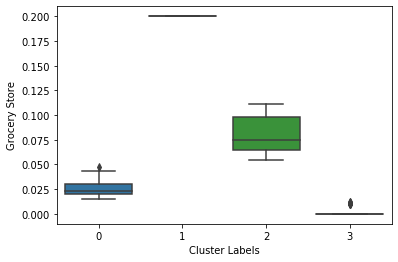

In [46]:
import seaborn as sns
sns.boxplot(Houston_merged['Cluster Labels'], Houston_merged['Grocery Store'])

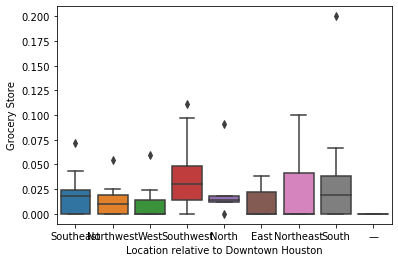

In [48]:
sns.boxplot(Houston_merged['Location relative to Downtown Houston'], Houston_merged['Grocery Store'])

In [49]:
Houston_merged.describe()

,Grocery Store,Cluster Labels,Number,Latitude,Longitude
count,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.022439,1.886364,44.500000,29.796534,-95.403973
std,0.033481,1.351303,25.547342,0.380129,0.174381
min,0.000000,0.000000,1.000000,29.579670,-96.627070
25%,0.000000,0.000000,22.750000,29.694985,-95.483457
50%,0.011176,3.000000,44.500000,29.745450,-95.386625
75%,0.029888,3.000000,66.250000,29.814483,-95.304727
max,0.200000,3.000000,88.000000,33.217340,-95.110510


# Discussion & Results

Houston averages 0.024497 grocery stores overall within its 88 super neighborhoods 
The super neighborhoods were split into a total of 4 clusters 
- Cluster 0 (red): Neighborhoods with moderate frequency of grocery stores  
- Cluster 1 (blue): Neighborhoods with high frequency of grocery stores 
- Cluster 2 (light blue): Neighborhoods with low frequency of grocery stores 
- Cluster 3 (green): Neighborhoods with very high frequency of grocery stores 

The analysis of the results shows that Houston overall has a low frequency of grocery stores within its super neighborhoods, having a mean frequency of grocery stores being 0.024497. In terms of the clustered data, cluster 2 has the lowest overall frequency of grocery stores by comparison to other groups. Cluster 3 is shown to have the highest frequency of grocery stores by a large margin when compared to other clusters, making it a possible outlier cluster group for grocery stores in super neighborhood within Houston, Texas. In further looking at the frequency of grocery stores based on location relative to downtown Houston, areas located to the Northeast, and Southwest have the largest frequency of grocery stores. The lowest frequency of grocery stores relative to downtown Houston is central Houston showing 0 grocery stores in the area.  
Overall the best location to set up a new grocery store would be within cluster 2, as it has the lowest frequency of grocery stores and therefore the lowest amount of competitors present. The overall best location in cluster 2 would be areas in either central Houston or areas within the loop. The worst location would be the Northeast or Southwest as they would be closer to competitors or any areas within cluster 1 or 3.  
 

# Conclusion

The goal of this project was to analyze the 88 super neighborhoods that are located within Houston Texas in order to see possible food desert locations as well as determine the best location to open a new grocery store that would have the least competition leading to a possible more successful store. Neighborhood data was collected using a web scrape of Houston neighborhoods located on Wikipedia web page. This data was geolocated and then mapped to check for accuracy. The frequency of grocery stores were then found for each of the 88 super neighborhoods using the Foursquare API. The data sets were then merged and clustered in order to better analyze each super neighborhood. Overall the conclusion of the project is that Houston has a low frequency of grocery stores and a large amount of food deserts, and the best place to open a new grocery store would be in central Houston cluster 2. This project was made using the Foursquare API Sandbox Tier Developer Account, this limits the number of API calls and therefor limits the depth of our search and the results returned. Before a final decision should be concerning the projects results, further consideration should be done that looks at areas other than frequency or competition data before setting up a new store. Other areas such as income level and population density within the defined neighborhoods should also be considered to best determine the optimal location for a grocery store.  
 